In [1]:
import numpy as np
from nodes import Node, Relu, MSE

Training Data Shape:
X_train: (50, 1)
y_train: (50,)

First 5 samples:
X[0] = -2.000, y[0] = 2.006
X[1] = -1.918, y[1] = 1.731
X[2] = -1.837, y[2] = 1.584
X[3] = -1.755, y[3] = 1.437
X[4] = -1.673, y[4] = 1.021


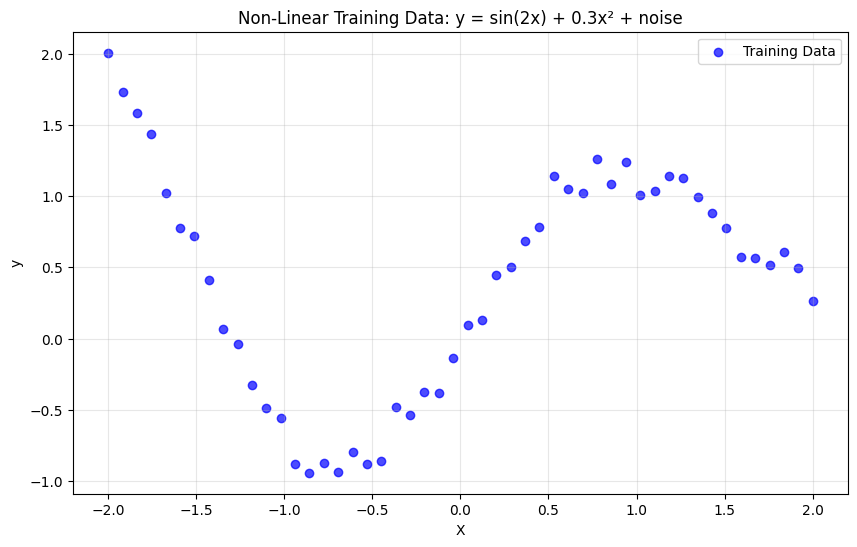


Test Data Shape: X_test: (20, 1), y_test: (20,)

NETWORK ARCHITECTURE NEEDED:
Input size: 1 (single feature)
Hidden size: 10 (you choose this)
Output size: 1 (single target)

Flow: Input(1) → Node1(1→10) → ReLU → Node2(10→1) → Output(1)

This requires:
- Node1: weight shape (1, 10), bias shape (10,)
- Node2: weight shape (10, 1), bias shape (1,)


In [2]:
# Generate data with LLM Agent


import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate non-linear data
def generate_nonlinear_data(n_samples=100):
    """
    Generate non-linear data that requires hidden layers to learn
    """
    # Single input feature
    X = np.linspace(-2, 2, n_samples)
    
    # Non-linear target: y = sin(x) + 0.3*x^2 + noise
    y = np.sin(X * 2) + 0.3 * X**2 + 0.1 * np.random.randn(n_samples)
    
    return X.reshape(-1, 1), y  # X as column vector

# Generate the data
X_train, y_train = generate_nonlinear_data(50)

print("Training Data Shape:")
print(f"X_train: {X_train.shape}")  # Should be (50, 1)
print(f"y_train: {y_train.shape}")  # Should be (50,)

print("\nFirst 5 samples:")
for i in range(5):
    print(f"X[{i}] = {X_train[i,0]:.3f}, y[{i}] = {y_train[i]:.3f}")

# Plot the data to visualize non-linearity
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.7, color='blue', label='Training Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Training Data: y = sin(2x) + 0.3x² + noise')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Test data for evaluation
X_test = np.linspace(-2, 2, 20).reshape(-1, 1)
y_test = np.sin(X_test.flatten() * 2) + 0.3 * X_test.flatten()**2  # No noise for test

print(f"\nTest Data Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Architecture specification for your 2-layer network:
print("\n" + "="*50)
print("NETWORK ARCHITECTURE NEEDED:")
print("="*50)
print("Input size: 1 (single feature)")
print("Hidden size: 10 (you choose this)")
print("Output size: 1 (single target)")
print("\nFlow: Input(1) → Node1(1→10) → ReLU → Node2(10→1) → Output(1)")
print("\nThis requires:")
print("- Node1: weight shape (1, 10), bias shape (10,)")
print("- Node2: weight shape (10, 1), bias shape (1,)")

In [3]:
# Task is to make a neural network that can learn the function y = sin(2x) + 0.3x² + noise

# 1st layer: Input(1) → Hidden(10)
linear_one = Node(input_size=1, output_size=50)
alpha = 0.1  # Increased learning rate
# 1st layer activation
relu = Relu()

# 2nd layer: Hidden(10) → Output(1)
linear_two = Node(input_size=50, output_size=1)

# loss function setup

loss = MSE()

# training loop

for epoch in range(500):
    

    # Linear 1st layer output
    linear_one_output = linear_one.forward(X_train)

    # Activation 1st layer
    activation = relu.forward(linear_one_output)

# 2nd layer output
    linear_two_output = linear_two.forward(activation)
    

    # loss function (flatten output to match y_train shape)
    loss_value = loss.forward(y_train, linear_two_output.flatten())

    grad_from_loss = loss.backward().reshape(-1, 1)  # Reshape to match network output
    grad_from_linear2 = linear_two.backward(grad_from_loss, alpha=alpha)
    grad_from_relu = relu.backward(grad_from_linear2)
    linear_one.backward(grad_from_relu, alpha=alpha)



    

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}: Loss={loss_value:.4f}")

Epoch 50: Loss=0.2063
Epoch 100: Loss=0.0828
Epoch 150: Loss=0.0563
Epoch 200: Loss=0.0468
Epoch 250: Loss=0.0415
Epoch 300: Loss=0.0375
Epoch 350: Loss=0.0343
Epoch 400: Loss=0.0316
Epoch 450: Loss=0.0295
Epoch 500: Loss=0.0274


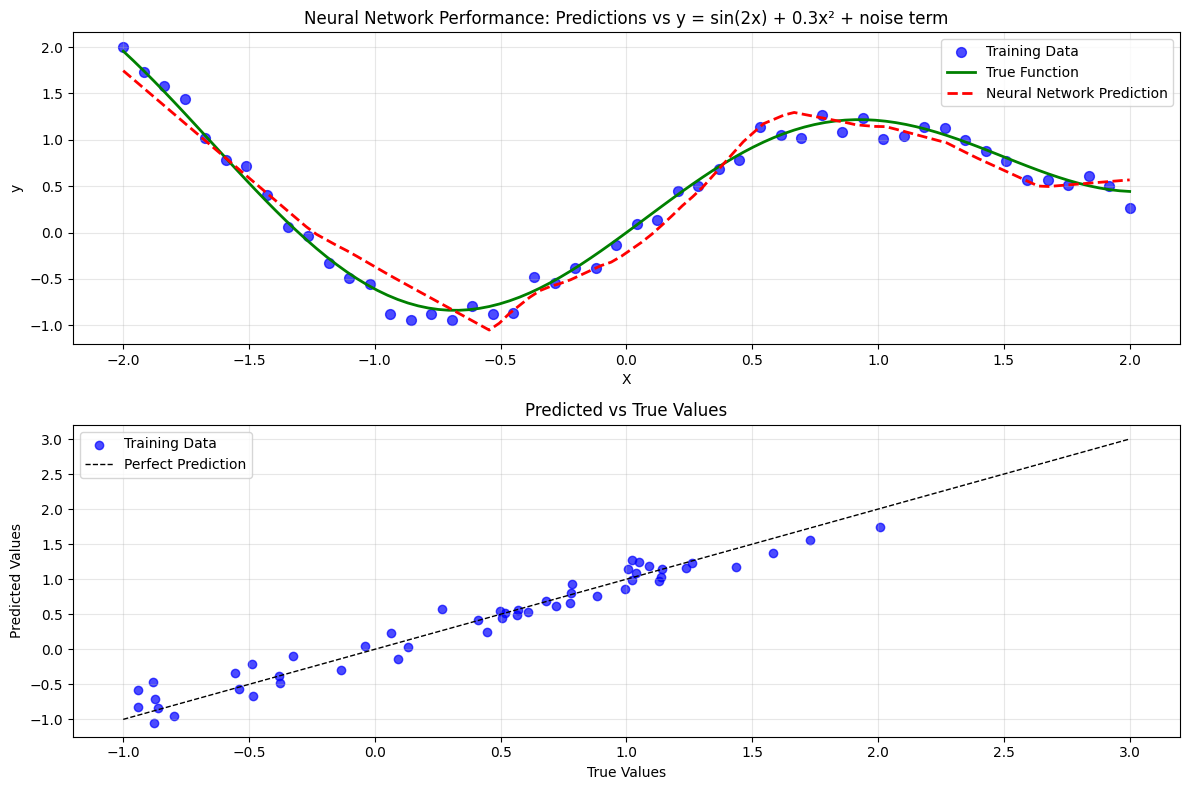

Training MSE: 0.0273
Test MSE: 0.0211
Final Training Loss: 0.0274


In [ ]:
# Examine the trained model


# Test the model on new data
def predict(X):
   
    # Forward pass
    layer1_out = linear_one.forward(X)
    relu_out = relu.forward(layer1_out)
    layer2_out = linear_two.forward(relu_out)
    return layer2_out.flatten()

# Generate smooth test data for plotting
X_plot = np.linspace(-2, 2, 100).reshape(-1, 1)
y_true_plot = np.sin(X_plot.flatten() * 2) + 0.3 * X_plot.flatten()**2  # True function (no noise)
y_pred_plot = predict(X_plot)

# Plot results
plt.figure(figsize=(12, 8))

# Subplot 1: Model vs True Function
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_train, alpha=0.7, color='blue', label='Training Data', s=50)
plt.plot(X_plot, y_true_plot, 'g-', linewidth=2, label='True Function')
plt.plot(X_plot, y_pred_plot, 'r--', linewidth=2, label='Neural Network Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Performance: Predictions vs y = sin(2x) + 0.3x² + noise term')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Training vs Test Performance
plt.subplot(2, 1, 2)
train_predictions = predict(X_train)
plt.scatter(y_train, train_predictions, alpha=0.7, color='blue', label='Training Data')
plt.plot([-1, 3], [-1, 3], 'k--', linewidth=1, label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate performance metrics
train_mse = np.mean((y_train - train_predictions) ** 2)
test_predictions = predict(X_test)
test_mse = np.mean((y_test - test_predictions) ** 2)


print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Final Training Loss: {loss_value:.4f}")


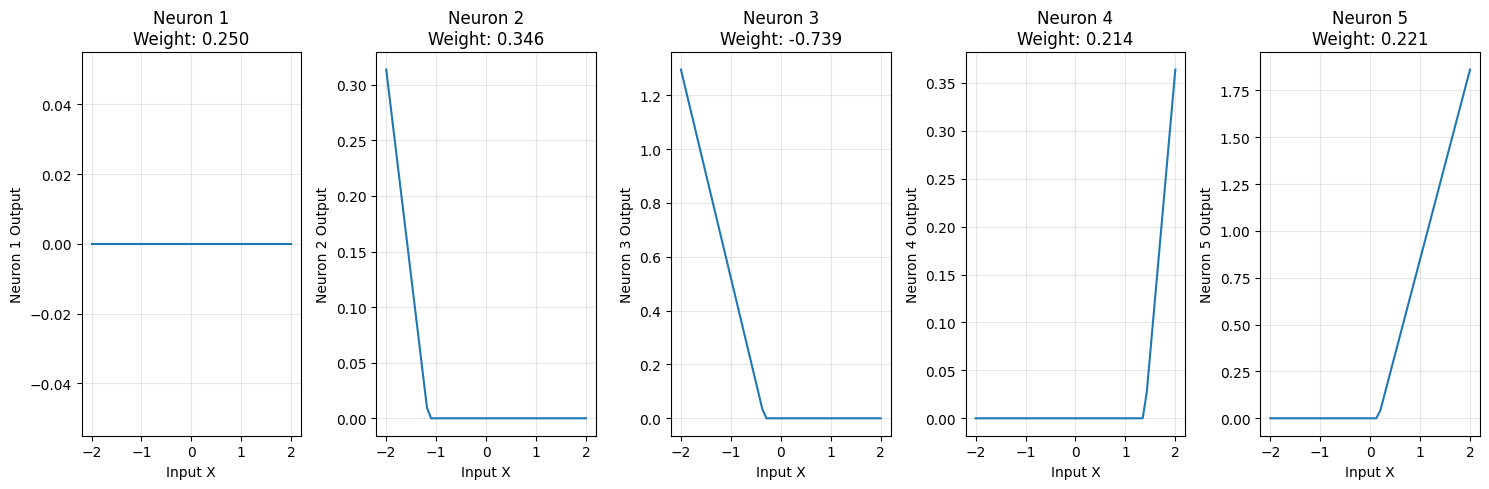

In [5]:
# Plot individual neuron behaviors
test_range = np.linspace(-2, 2, 50).reshape(-1, 1)
layer1_out = linear_one.forward(test_range)
relu_out = relu.forward(layer1_out)

plt.figure(figsize=(15, 5))
for i in range(min(5, relu_out.shape[1])):  # Plot first 5 neurons
    plt.subplot(1, 5, i+1)
    plt.plot(test_range, relu_out[:, i])
    plt.title(f'Neuron {i+1}\nWeight: {linear_two.weight[i,0]:.3f}')
    plt.xlabel('Input X')
    plt.ylabel(f'Neuron {i+1} Output')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()